In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path= "/content/drive/My Drive/tweets.csv"
df= pd.read_csv(file_path)
df.tail()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
595,596,@user1085,2025-03-02 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
596,597,@econTalk8,2025-03-02 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
597,598,@greenFutureNow8,2025-03-02 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
598,599,@indiePerspective8,2025-03-02 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral
599,600,@libertyMovement14,2025-03-02 12:20:45,Chase Oliver is expanding his base among liber...,Chase Oliver,Libertarian Party,40,160,positive


8.0
6.0


<Axes: ylabel='count'>

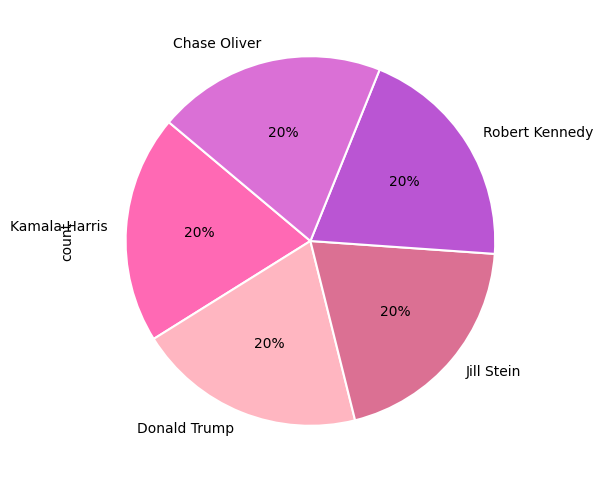

In [12]:
# PLot pie chart showing the candidates split
my_colors = ["#FF69B4", "#FFB6C1", "#DB7093", "#BA55D3", "#DA70D6"]

plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

df.candidate.value_counts().plot(kind='pie', autopct='%1.0f%%',colors=my_colors, startangle=140,  wedgeprops={"edgecolor": "white", "linewidth": 1.5}, )

<Axes: ylabel='count'>

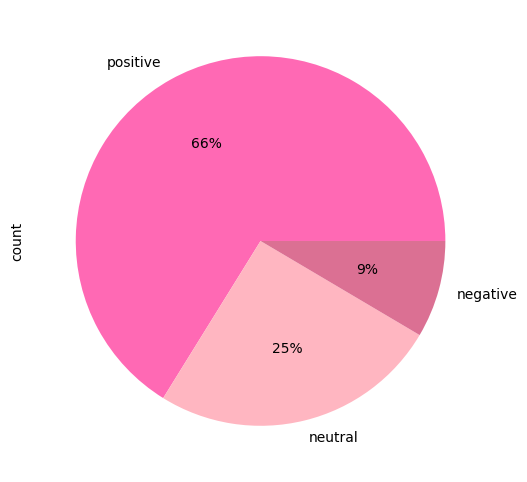

In [14]:
# Ratio of Negative to Neutral to Postive sentiments
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=my_colors)

<Axes: xlabel='candidate'>

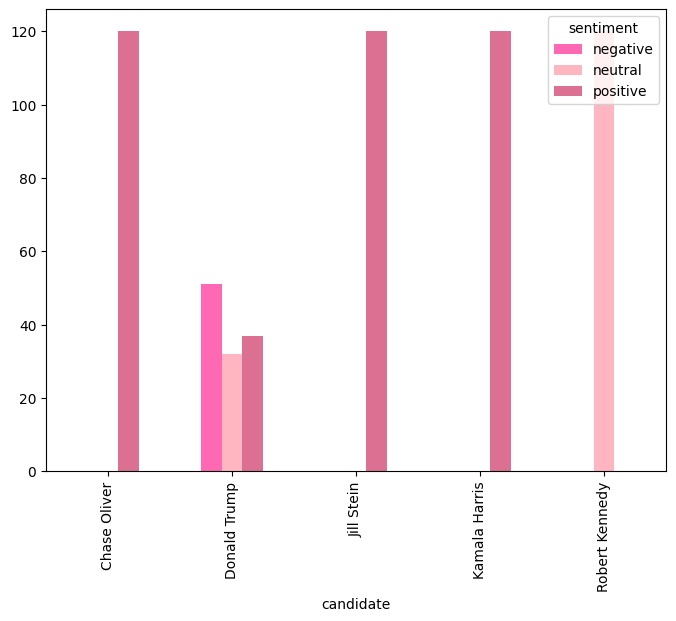

In [17]:
# Split of each candidate
sentiment = df.groupby(['candidate', 'sentiment']).sentiment.count().unstack()
sentiment.plot(kind='bar', color=my_colors)

In [21]:
# Spliting the text and labels

# Our text lies in column 3 (4th column)
features = df.iloc[:, 3].values

# Our labels lie in column 8 (9th column)
labels = df.iloc[:, 8].values

In [22]:
# Cleaning up our text using Regular Expressions (regex)
import re
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [23]:
# Performing our vectoriztion using TF-IDF scheme from the Scikit-learn libary

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# We use max_features of 2500 which is the top 2500 most frequently occuring words to create our bag of words model
# max_df specifies that only use those words that occur in a maximum of 80% of the documents.
# min-df is set to 7 which shows that include words that occur in at least 7 documents.
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# We use the vectorizer.fit_transform to transform our words into our processed features vector
processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Create our training and test datasets using a 80%, 20% split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [25]:
# Using Random Forest algorith to create classifier
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [26]:
# Let's obtain our predictions on our test dataset
predictions = text_classifier.predict(X_test)

In [27]:
# Let's display the results of our classifier on our test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

[[14  1  0]
 [ 0 24  0]
 [ 1  1 79]]
              precision    recall  f1-score   support

    negative       0.93      0.93      0.93        15
     neutral       0.92      1.00      0.96        24
    positive       1.00      0.98      0.99        81

    accuracy                           0.97       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.98      0.97      0.98       120

Accuracy 97.50%


In [28]:
# Obtain a test sample text from our test dataset

rand_index = np.random.randint(0,len(processed_features))
test_sample = processed_features[rand_index]
print(test_sample)

jill stein promotes the use of electric vehicles to lower emissions 


In [29]:
# Try our classifer on our text
vector = vectorizer.transform([test_sample])
output = text_classifier.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - positive
